## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import time
import math
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, f1_score
import pymysql
from functools import reduce
import warnings

warnings.filterwarnings("ignore")
pd.set_option('display.max_column', None)

## Connect to database

In [2]:
dbcon = pymysql.connect(host = "localhost", user = "" , password = "" , database = "jobms")

In [3]:
df = pd.read_sql_query("""select * from consolidated_search_ds;""", dbcon)

In [4]:
df.head()

,Job Title,Company,Area,Employer Email,Employer Contact Number,Salary,Lower Salary Range,Upper Salary Range,Job Highlights,Job Description,Career Level,Qualification,Years of Experience,Job Type,Company Website,Job Link,Job Functions,Industry,Search Term,Date Posted,Date Scraped,Data Source,jobtick_avgsalary,jobtick_SQL,jobtick_Excel,jobtick_dashboard,jobtick_Python,jobtick_engineerjobs,jobtick_analystjobs,jobtick_scientistjobs
0,Business Analyst (Data Analysis),EC Healthcare,Not Specified,None,None,Not Specified,NaN,NaN,"['Develop and built segmentation platform', 'C...","['Job Descriptions:', 'Develop strategic KPIs ...",Entry,Not Specified,-1.0,"Full Time, Permanent",Not Specified,/hk/en/job/business-analyst-data-analysis-1000...,"Information Technology (IT), DBA, E-commerce, ...",Health & Beauty Care,Data Scientist,10-22-2021,22-10-2021,JobsDB,NaN,1.0,1.0,1.0,1.0,NaN,1.0,NaN
1,Data Analyst Leader,A4lution Limited,Not Specified,None,['3955 8549'],Not Specified,NaN,NaN,"['Drive automation of analytical projects', 'I...","['Responsibilities:', 'Work closely with senio...",Senior,Degree,3.0,Full Time,Not Specified,/hk/en/job/data-analyst-leader-100003008838120,"Information Technology (IT), Data Scientist",Others,Data Scientist,10-22-2021,22-10-2021,JobsDB,NaN,1.0,1.0,1.0,1.0,NaN,1.0,NaN
2,Data Analyst – Campaign Specialist,now TV,Not Specified,None,['2827 8322'],Not Specified,NaN,NaN,['Interpret & analyze data for campaign evalua...,"['The Job:', 'Hands on experience in conductin...",Entry,Degree,1.0,Full Time,http://www.pccw.com,/hk/en/job/data-analyst-campaign-specialist-10...,"Marketing / Public Relations, Others, Informat...",Telecommunication,Data Scientist,10-22-2021,22-10-2021,JobsDB,NaN,1.0,1.0,NaN,NaN,NaN,1.0,NaN
3,Consultant / Senior Consultant - Data Scientis...,Deloitte Global Services Limited,Not Specified,None,None,Not Specified,NaN,NaN,"['data scientist', 'digital', 'tableau']","['About Technology', 'Deloitte Digital is a bo...",Entry,Degree,2.0,Full Time,http://www.deloitte.com,/hk/en/job/consultant-senior-consultant-data-s...,"Professional Services, Business Analysis / Dat...",Accounting/Audit/Tax Services,Data Scientist,10-21-2021,22-10-2021,JobsDB,NaN,1.0,NaN,1.0,1.0,NaN,NaN,1.0
4,Business Intelligence Assistant / Data Analyst...,Lloyd Karson International Limited,Not Specified,None,None,HK$17K - 25K /month,17.0,25.0,"['Experience with Python', 'Good Data Analytic...",['The client is a global prestigious MNC Insur...,Entry,Degree,1.0,"Full Time, Permanent",Not Specified,/hk/en/job/business-intelligence-assistant-dat...,"Professional Services, Business Analysis / Dat...",Human Resources Management/Consultancy,Data Scientist,10-22-2021,22-10-2021,JobsDB,21.0,1.0,NaN,1.0,1.0,NaN,1.0,NaN


## Data Summary

In [5]:
df.shape

(3211, 30)

In [6]:
# Function for getting details of the dataframe
def details(df):
    print('Shape of the Dataframe:' , df.shape , '\n')
    print('Summary Of the dataframe:' , '\n')
    print(df.info(),'\n')
    print('Statistical Summary of the Dataframe:' , '\n' , df.describe() , '\n')
    print('Checking for Null values in the dataframe:' , '\n' , df.isnull().sum() , '\n')
    print('Columns in dataframe:' , df.columns)
    
    
# Function for getting insigt for each column values
def values_in_columns(df):
    for i in df.columns:
        print('Column Name--->'+i)
        print('Number of Unique Values' , df[i].nunique() , '\n')
        print('Count of each unique value \n' , df[i].value_counts() , '\n')
        
        
# Function for dropping duplicates        
def duplicate(df):
    if df.duplicated().sum()>0:
        print('Dataframe contains duplicate values' , df.duplicated().sum())
        df.drop_duplicates(inplace=True, ignore_index=True)
        print('Details of dataframe after dropping the Duplicate rows')
        details(df)
    else:
        print("Dataframe doesn't contain any duplicate Values")

In [7]:
duplicate(df)

Dataframe doesn't contain any duplicate Values


In [8]:
details(df)

Shape of the Dataframe: (3211, 30) 

Summary Of the dataframe: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3211 entries, 0 to 3210
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Job Title                3211 non-null   object 
 1   Company                  3211 non-null   object 
 2   Area                     3211 non-null   object 
 3   Employer Email           167 non-null    object 
 4   Employer Contact Number  358 non-null    object 
 5   Salary                   3211 non-null   object 
 6   Lower Salary Range       318 non-null    float64
 7   Upper Salary Range       318 non-null    float64
 8   Job Highlights           3211 non-null   object 
 9   Job Description          3211 non-null   object 
 10  Career Level             3211 non-null   object 
 11  Qualification            3211 non-null   object 
 12  Years of Experience      3211 non-null   float64
 13  Job Type     

In [10]:
values_in_columns(df)

Column Name--->Job Title
Number of Unique Values 2789 

Count of each unique value 
 Business Analyst                                                    46
System Analyst                                                      35
Analyst Programmer                                                  31
Data Analyst                                                        25
Data Scientist                                                      17
                                                                    ..
Enterprise Compute Specialist                                        1
Service Engineer (Fresh graduates are also welcome)                  1
Senior Security Consultant                                           1
Senior Analyst / Analyst (Application Development) (three posts)     1
Project Management Officer                                           1
Name: Job Title, Length: 2789, dtype: int64 

Column Name--->Company
Number of Unique Values 1232 

Count of each unique value 
 IT So

## Interpretations

Total Number of companies = 1232<br>
Total number of industry = 51<br>
Total Number of Job Type = 41<br>

Total entry level jobs = 1328<br>
Total number of middle level job = 1000<br>
Total number of senior level job = 883<br>

Total Data Scientist  jobs =  2490<br>
Total Data Analyst jobs =    502<br>
Total Business Intelligence jobs =   137<br>
Total Data Engineer jobs =   55<br>
Total Machine Learning Engineer = 27<br>

In [11]:
font = {'family': 'serif',
        'weight': 'normal',
        'size': 30,
        }

# Function for ploting bar graph for each column of the dataframe
def plot_each_columns(data):
    for i in list(data.columns)[:5]:
        if len(data[i].value_counts())>=20:
            df = data[i].value_counts()[:20]
            plt.figure(figsize=(30,10))
            sns.barplot(x=df.index, y=df)
            plt.xticks(rotation=90,fontsize = 20)
            plt.yticks(fontsize = 20)
            plt.ylabel(i, fontsize = 20)
            plt.title(i,fontdict=font)
            
        else:
            df = data[i].value_counts()
            plt.figure(figsize=(30,10))
            sns.barplot(x=df.index, y=df)
            plt.xticks(rotation=90,fontsize = 20)
            plt.yticks(fontsize = 20)
            plt.title(i,fontdict=font)

# Function for plotting countplot of each with repect to any specific column for column havind unique value less than 20
def plot_columns(data, hue_name):
    for i in data.columns:
    
        if len(data[i].value_counts())<20:
            f, ax = plt.subplots(figsize=(10, 8))
            ax = sns.countplot(x=i, hue=hue_name, data=df)
            ax.set_title("Frequency distribution of "+i+" variable wrt "+hue_name)
            plt.xticks(rotation=90,fontsize = 20)
            plt.yticks(fontsize = 20)
            plt.show()
            
# Function for plotting box plot of each numerical column
def boxplot_variable(data):
    for i in df.select_dtypes('number').columns:  
        f, ax = plt.subplots(figsize=(10, 8))
        ax = sns.boxplot(x=i, data=data)
        ax.set_title("Box Plot of "+i, fontsize = 15)
        plt.xticks(rotation=90,fontsize = 10)
        plt.yticks(fontsize = 10)
        plt.xlabel(i, fontsize = 15)
        plt.show()
        
# Function for plotting boxplot of each numerical column with respect to specific columns
def boxplot_mult(df,x,hue_name):
    for i in df.select_dtypes('number').columns:  
        f, ax = plt.subplots(figsize=(10, 8))
        ax = sns.boxplot( x=x,y=i,hue=hue_name, data=df)
        ax.set_title("Box Plot of "+i+" variable wrt "+x)
        plt.xticks(rotation=90, fontsize = 20)
        plt.yticks(fontsize = 20)
        plt.show()       

## Visual Insights

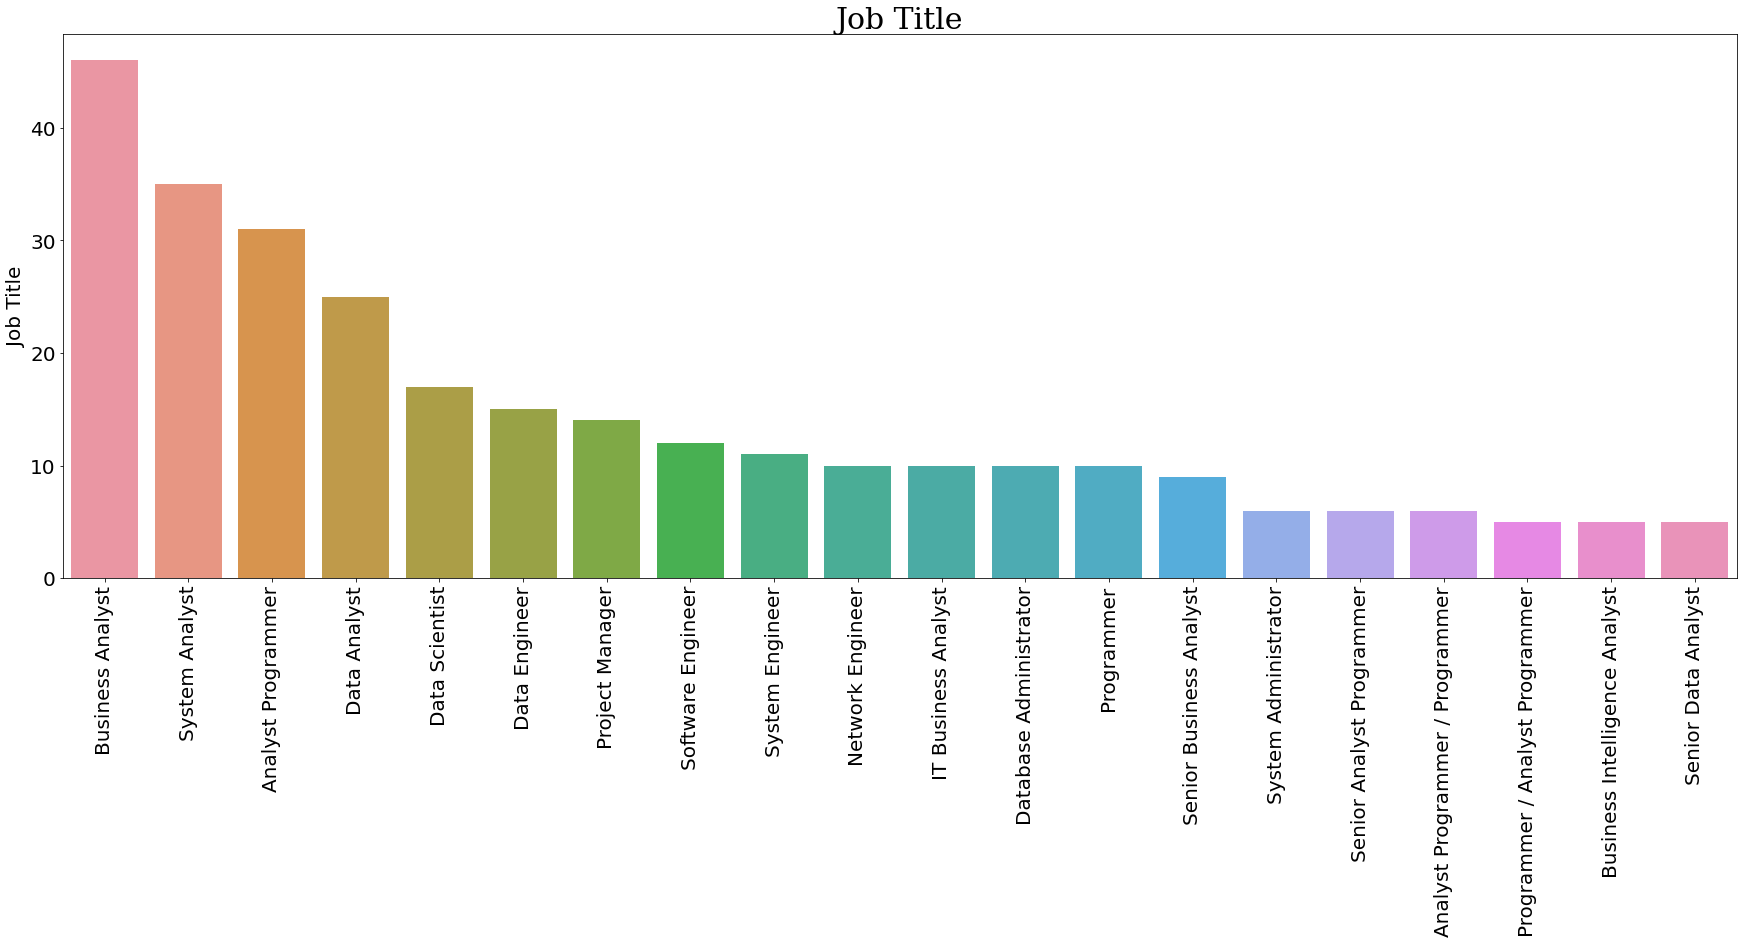

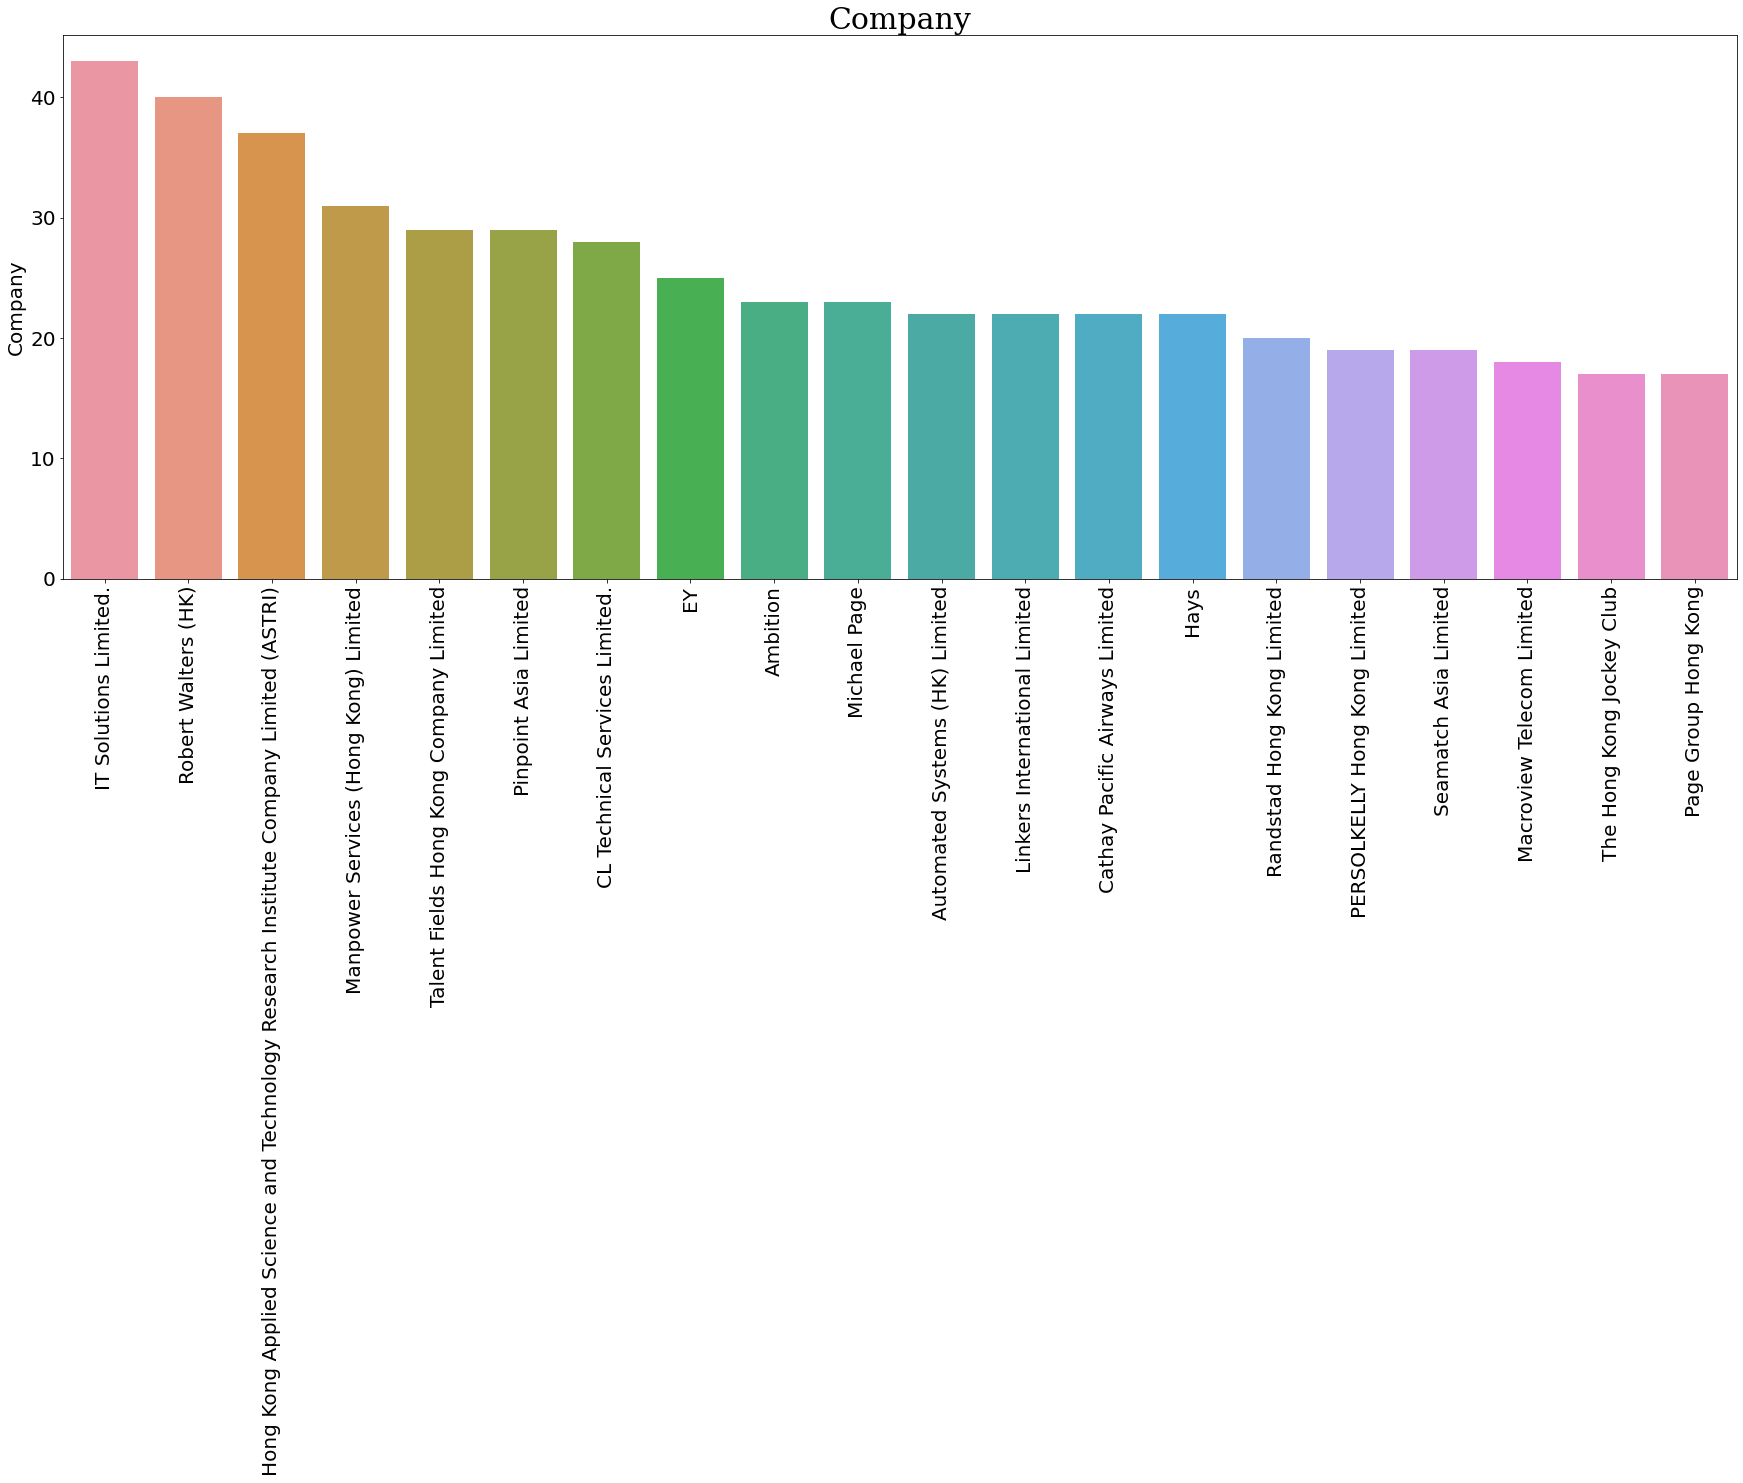

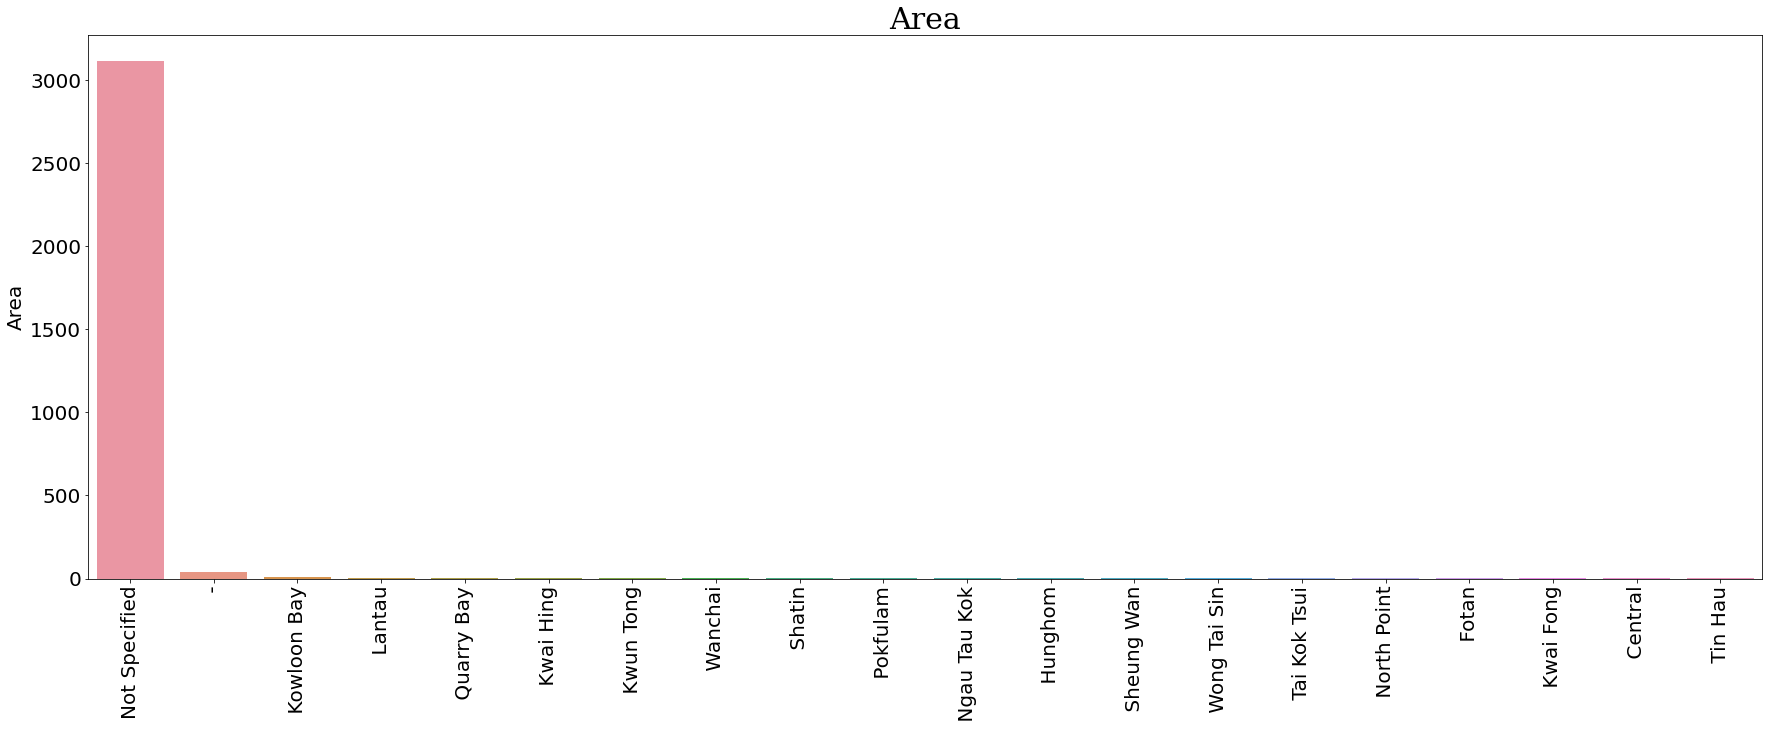

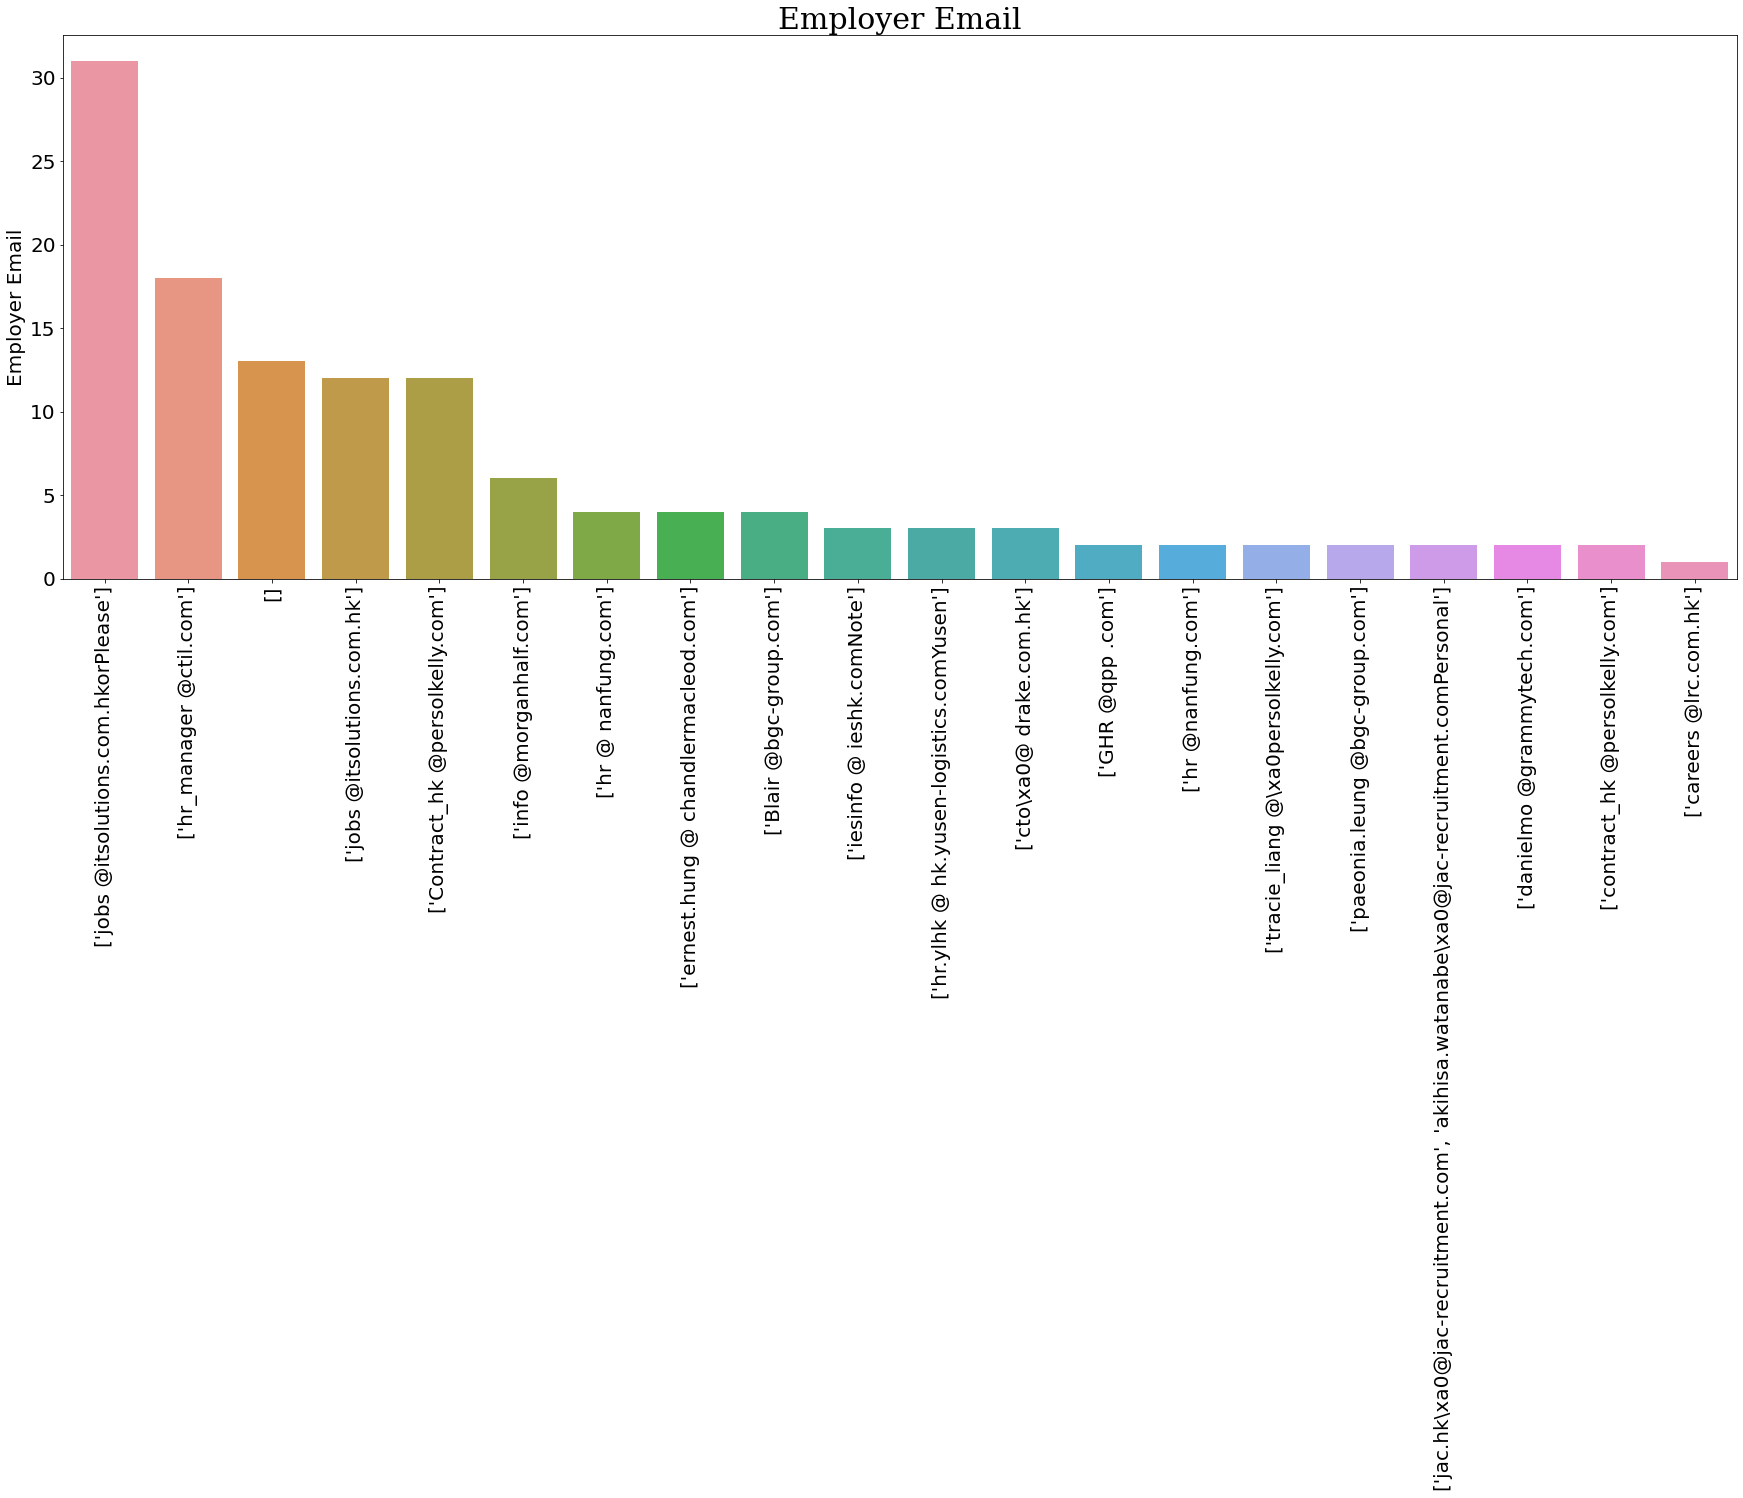

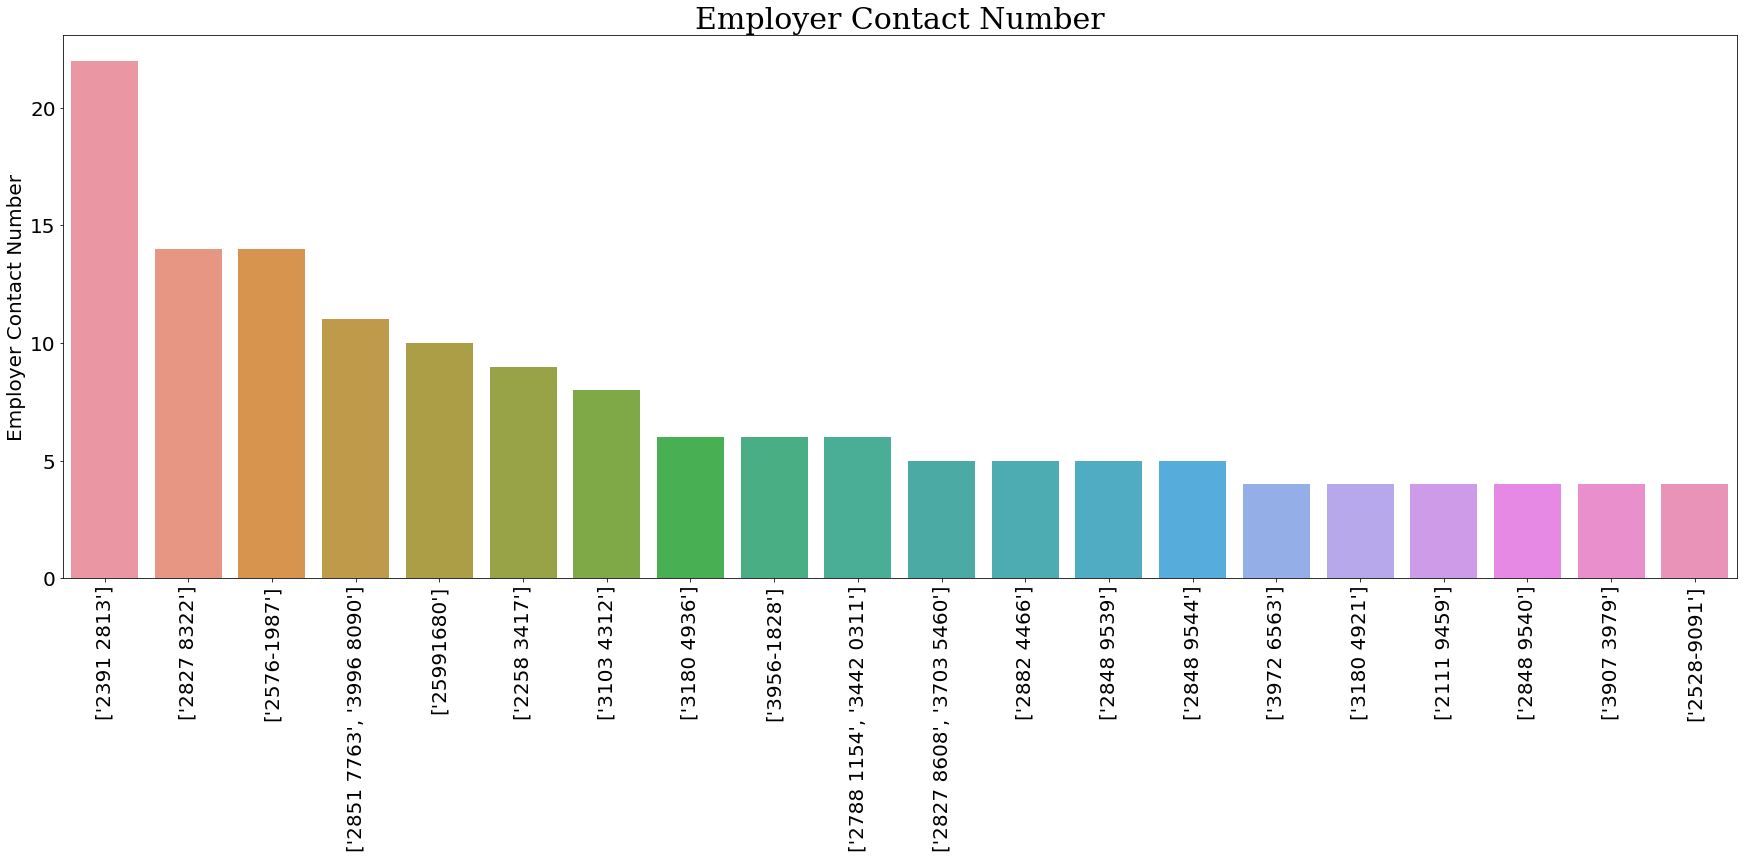

In [12]:
plot_each_columns(df)

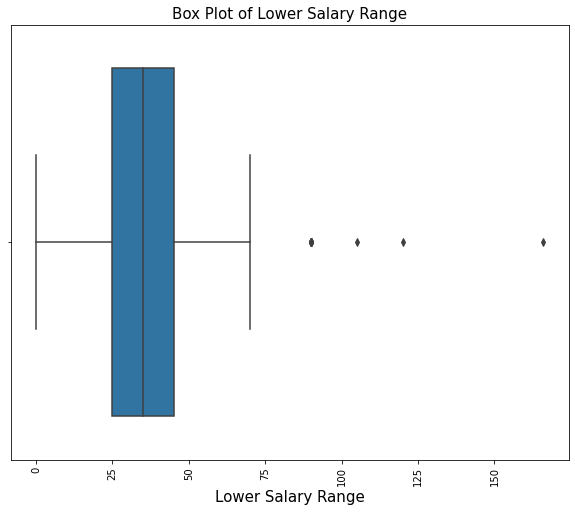

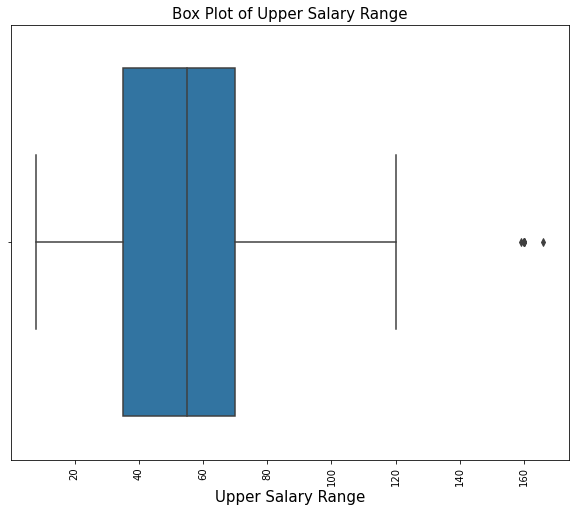

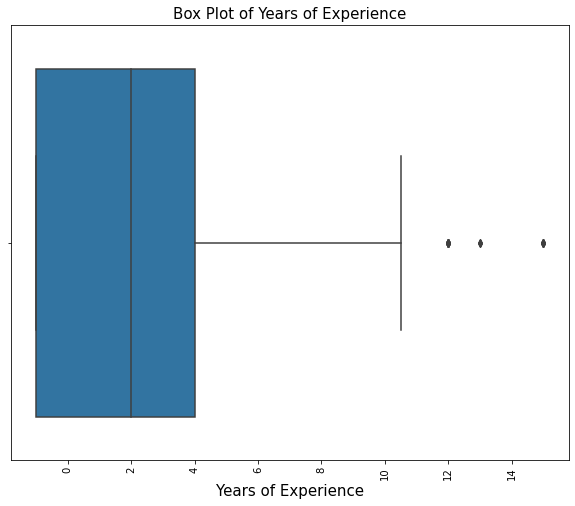

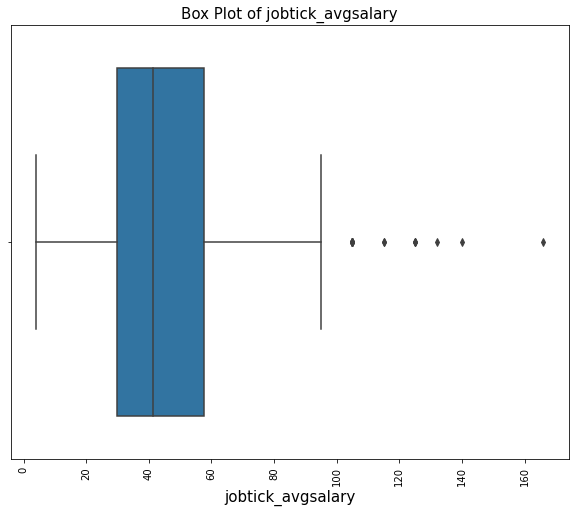

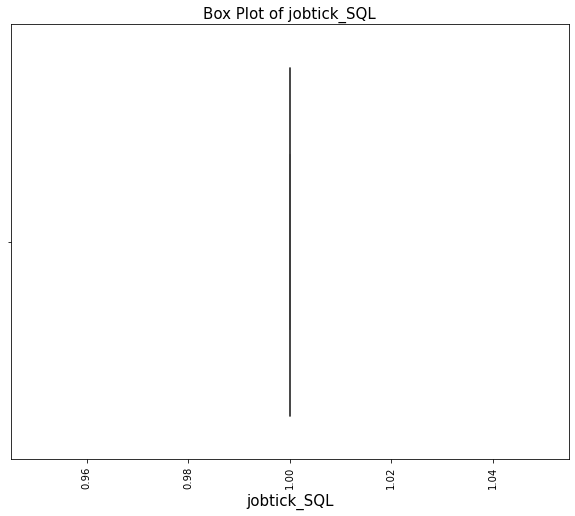

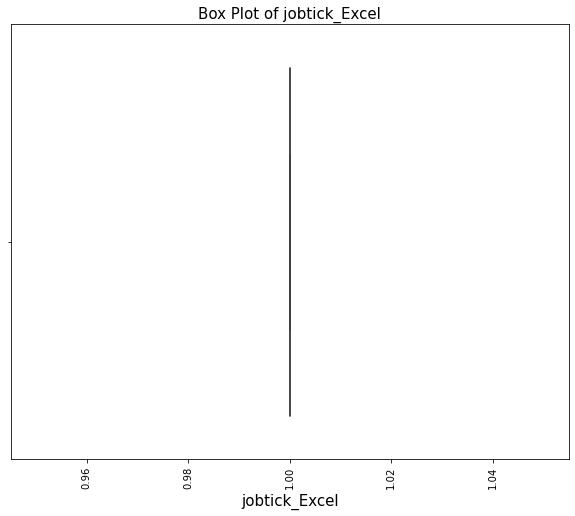

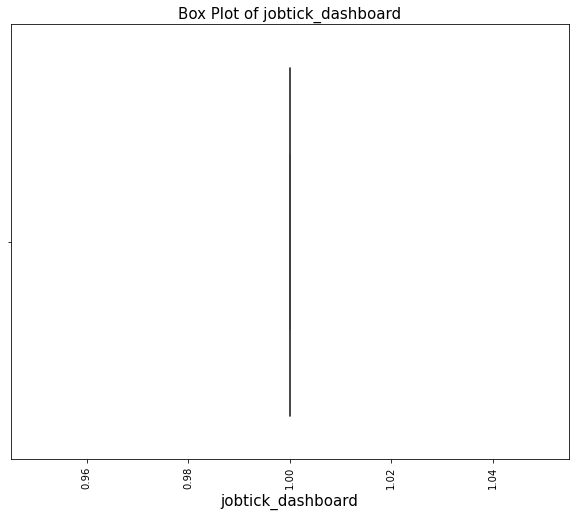

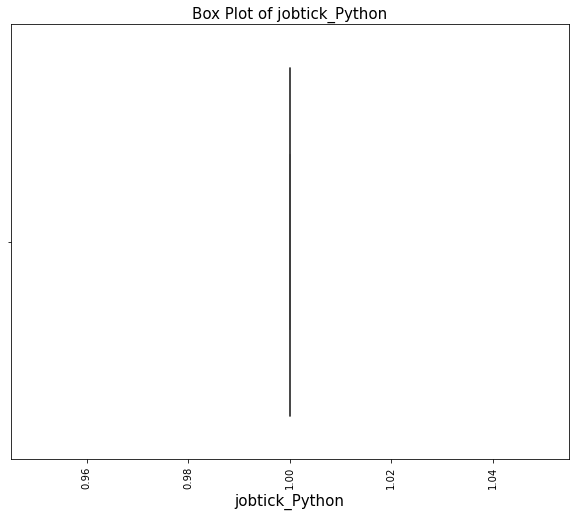

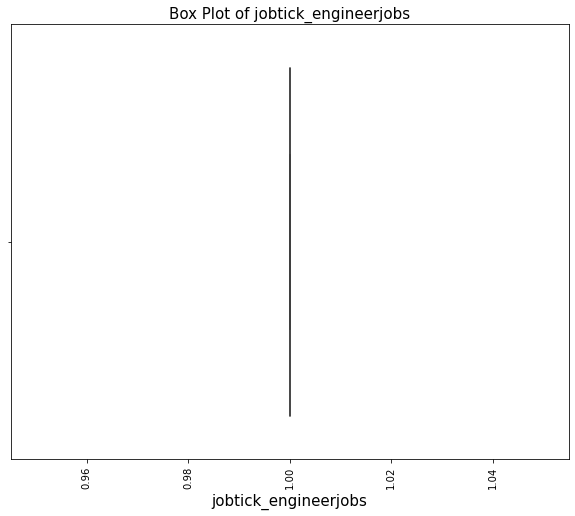

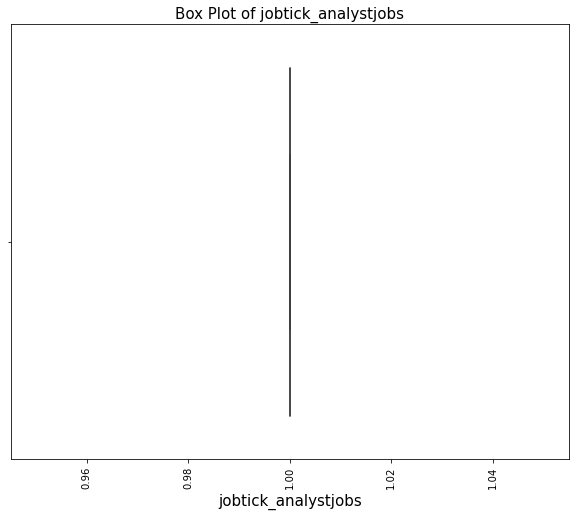

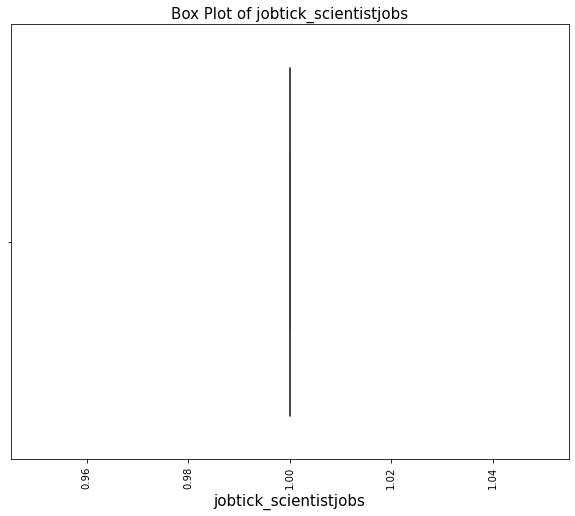

In [13]:
boxplot_variable(df)

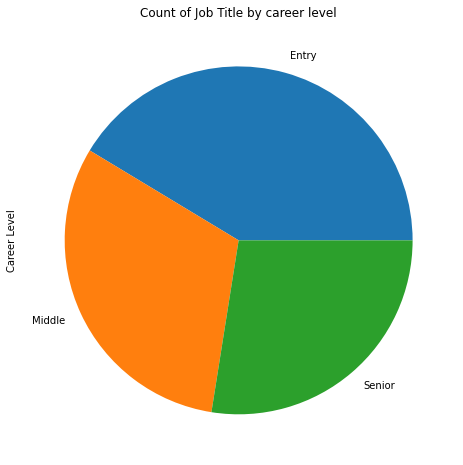

In [14]:
df['Career Level'].value_counts().plot(kind='pie', figsize=(8,8), title='Count of Job Title by career level');

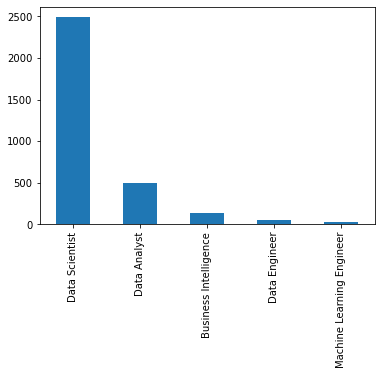

In [15]:
# From the graph we can observe that the DataScientist has highest number of job roles Machine Learning Engineer has least.

df['Search Term'].value_counts().plot.bar();

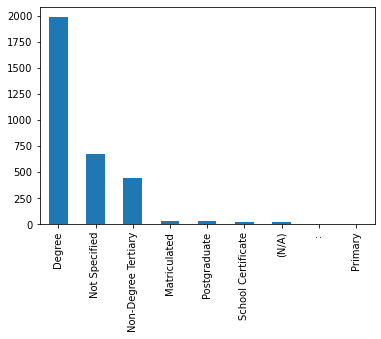

In [16]:
df['Qualification'].value_counts().plot.bar();

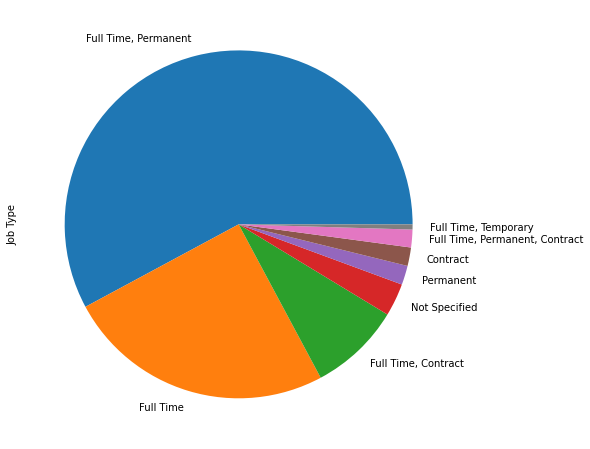

In [17]:
df['Job Type'].value_counts()[:8].plot(kind='pie',figsize=(8,8));

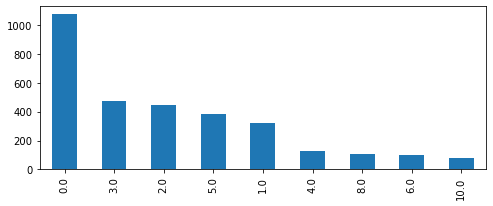

In [18]:
df['Years of Experience'].replace(-1,0).value_counts()[:10].plot.bar(figsize=(8,3));

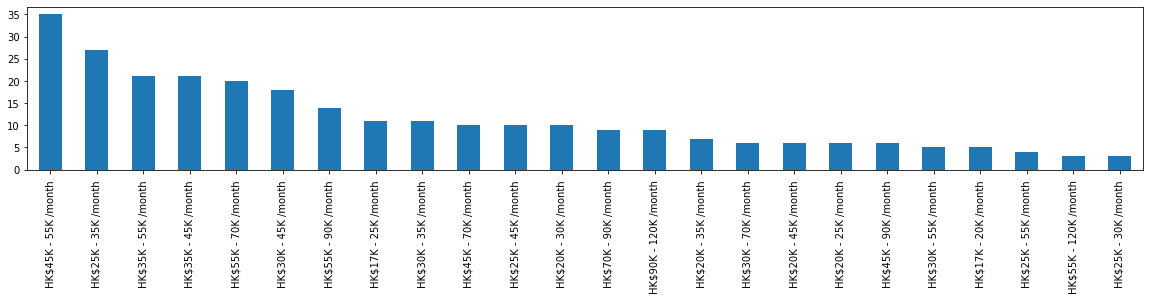

In [23]:
df['Salary'].value_counts()[1:25].plot.bar(figsize=(20,3));

In [24]:
df.columns

Index(['Job Title', 'Company', 'Area', 'Employer Email',
       'Employer Contact Number', 'Salary', 'Lower Salary Range',
       'Upper Salary Range', 'Job Highlights', 'Job Description',
       'Career Level', 'Qualification', 'Years of Experience', 'Job Type',
       'Company Website', 'Job Link', 'Job Functions', 'Industry',
       'Search Term', 'Date Posted', 'Date Scraped', 'Data Source',
       'jobtick_avgsalary', 'jobtick_SQL', 'jobtick_Excel',
       'jobtick_dashboard', 'jobtick_Python', 'jobtick_engineerjobs',
       'jobtick_analystjobs', 'jobtick_scientistjobs'],
      dtype='object')

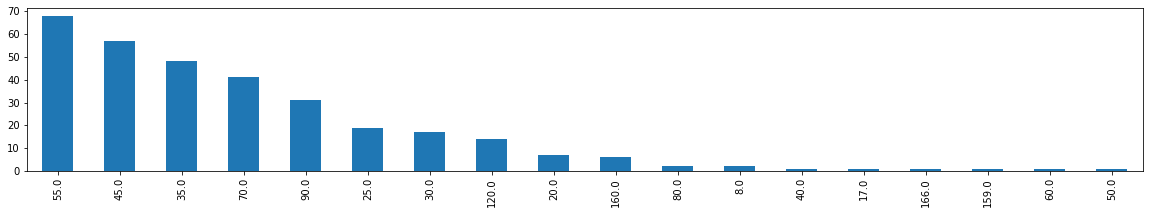

In [25]:
df['Upper Salary Range'].value_counts().plot.bar(figsize=(20,3));

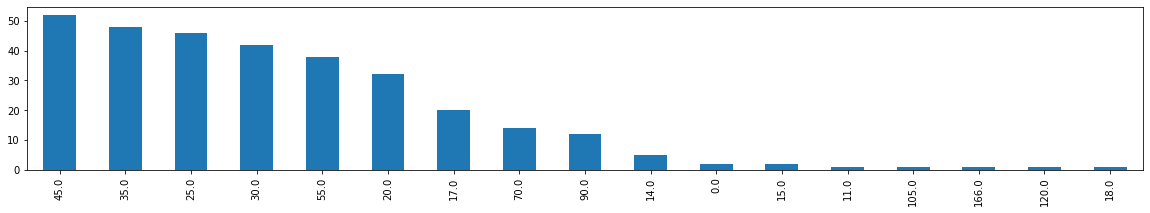

In [26]:
df['Lower Salary Range'].value_counts().plot.bar(figsize=(20,3));

## Statistical Analysis

In [44]:
# Total number of jobs: 3211
jobs = pd.read_sql_query("""select count(*) from consolidated_search_ds;""", dbcon)
jobs

,count(*)
0,3211


In [45]:
# Total number of companies: 1223
comp = pd.read_sql_query("""select count(distinct(company)) from consolidated_search_ds;""", dbcon)
comp

,count(distinct(company))
0,1223


In [46]:
# Total number of industries: 51
inds = pd.read_sql_query("""select count(distinct(industry)) from consolidated_search_ds;""", dbcon)
inds

,count(distinct(industry))
0,51


In [47]:
# Total career levels: 3
careers = pd.read_sql_query("""select distinct(`Career Level`) from consolidated_search_ds;""", dbcon)
careers

,Career Level
0,Entry
1,Senior
2,Middle


In [48]:
# Total job types: 41
job_types = pd.read_sql_query("""select count(distinct(`Job Type`)) from consolidated_search_ds;""", dbcon)
job_types

,count(distinct(`Job Type`))
0,41


In [49]:
# top 5 companies and total jobs
top5 = pd.read_sql_query("""select company, count(*) from consolidated_search_ds group by company order by count(*) desc limit 5;""", dbcon)
top5

,company,count(*)
0,IT Solutions Limited.,43
1,Robert Walters (HK),40
2,Hong Kong Applied Science and Technology Resea...,37
3,Manpower Services (Hong Kong) Limited,31
4,Talent Fields Hong Kong Company Limited,29


In [50]:
# career levels
cl = pd.read_sql_query("""select `career level`, count(*) from consolidated_search_ds group by `career level` order by count(*) desc;""", dbcon)
cl

,career level,count(*)
0,Entry,1328
1,Middle,1000
2,Senior,883


In [51]:
# company with the highest job opening in data science role
hdsr = pd.read_sql_query("""select company, count(*) from consolidated_search_ds where `search term` ='Data Scientist' group by company order by count(*) desc;""", dbcon)
hdsr

,company,count(*)
0,IT Solutions Limited.,37
1,Robert Walters (HK),33
2,Hong Kong Applied Science and Technology Resea...,32
3,Talent Fields Hong Kong Company Limited,23
4,Linkers International Limited,22
...,...,...
1028,Up Way China Bullion Limited,1
1029,Amazon Corporation Limited,1
1030,Unicorn Advisor (HK) Limited,1
1031,Standard Chartered Bank,1
